    # Automatic Jupyter Notebook for OpenML dataset 150: covertype

In [1]:
from scripts.preamble import *
did = 150
data = oml.datasets.get_dataset(did)
task, topList, strats = printTopNFlows(did, data.default_target_attribute, 10) 
topList 

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Flow does not have AUC evaluation.
Flow does not have AUC evaluation.


,flow,score
0,weka.Bagging_J48(2),0.997148
1,weka.END_ND_J48(2),0.996268
2,sklearn.ensemble.forest.RandomForestClassifier...,0.995326
3,sklearn.ensemble.forest.RandomForestClassifier...,0.995304
4,weka.RandomCommittee_RandomTree(2),0.992928
5,sklearn.ensemble.forest.RandomForestClassifier...,0.991304
6,sklearn.ensemble.forest.RandomForestClassifier...,0.991180
7,sklearn.tree.tree.DecisionTreeClassifier(22),0.954320
8,sklearn.tree.tree.DecisionTreeClassifier(22),0.954229
9,sklearn.tree.tree.DecisionTreeClassifier(22),0.954223


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


In [3]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

     did                      name  similarity                             url
0    380       SyskillWebert-Bands       0.868    https://www.openml.org/d/380
1    665           sleuth_case2002       0.837    https://www.openml.org/d/665
2    376       SyskillWebert-Sheep       0.825    https://www.openml.org/d/376
3    867     visualizing_livestock       0.783    https://www.openml.org/d/867
4    485       analcatdata_vehicle       0.779    https://www.openml.org/d/485
5    448       analcatdata_boxing1       0.771    https://www.openml.org/d/448
6    379       SyskillWebert-Goats       0.770    https://www.openml.org/d/379
7  40678                      led7       0.768  https://www.openml.org/d/40678
8    875     analcatdata_chlamydia       0.761    https://www.openml.org/d/875
9    374  SyskillWebert-BioMedical       0.755    https://www.openml.org/d/374


Complexity threshold to determine if an algorithm will be run.


In [4]:
comp = 50000000000000

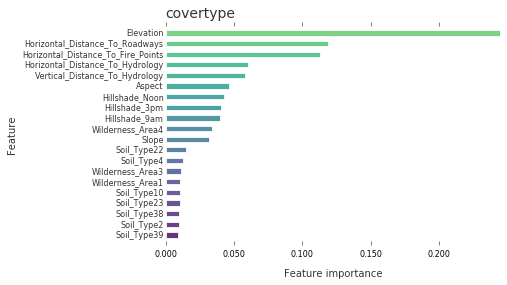

In [5]:
from scripts.featureImportance import *
featureImportance(data) 

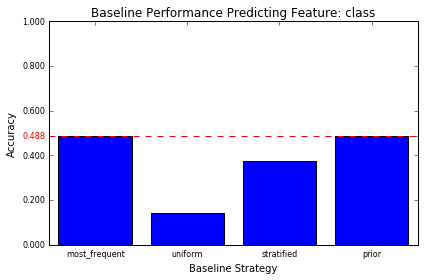

In [6]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Median execution time in ms: 20371270.0
Mean execution time in ms: 20371270.0


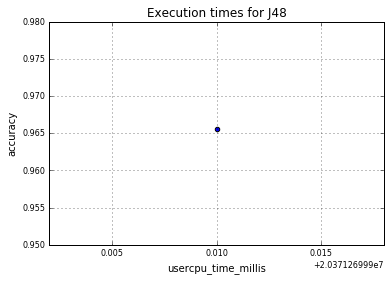

Skipping run because of time limit set
Median execution time in ms: 362990.0
Mean execution time in ms: 387832.5


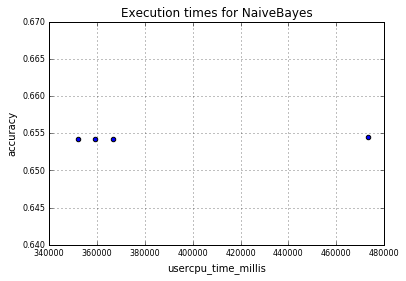

Skipping run because of time limit set
Skipping run because of time limit set
Skipping run because of time limit set
Skipping run because of time limit set


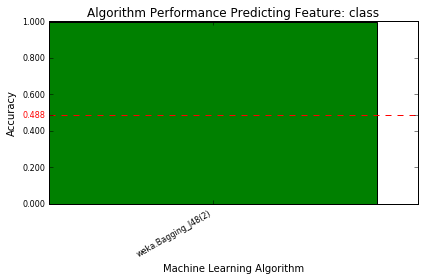

In [7]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=True, runTPOT=False)
plot_alg(data, strats, maxBaseline, problemType) 